In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fixed parameters
Omega = 2*np.pi/86400
R = 3486e3
rho = 13e3
U0 = 8.7e-5

# Trade off plot for a single value of the Hurst exponent

In [28]:
# Characteristic length scale
lambda0 = 1000e3
k0 = 2*np.pi/lambda0

In [62]:
N_array = np.array([5, 10, 20]) # B.V. frequency
H = 0.6

In [63]:
d = np.linspace(1,min(200e3,2*lambda0),500)

In [64]:
hrms = np.zeros((len(N_array), len(d)))
for i, N in enumerate (N_array):
    hrms[i] = np.sqrt( (2**(7+4*H) * d * (d*k0)**(-2*H) * np.pi**(2*H-1) * (2*H-1)) / (17 * R**2 * U0**2 * H * rho * Omega * np.sqrt(N**2-1)) ) * np.sqrt(1e7)


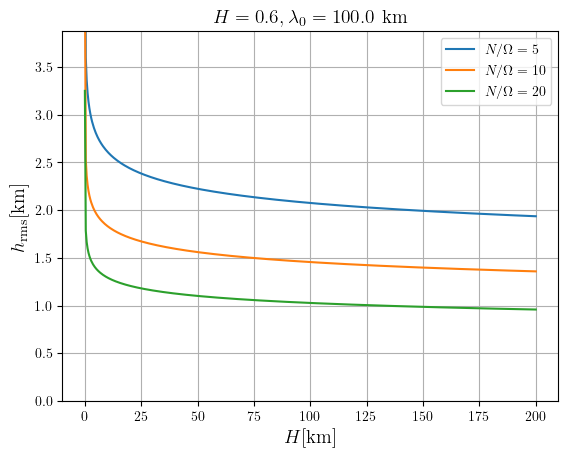

In [65]:
plt.rc('text', usetex=True)
Hidx = 1
for i in range(hrms.shape[0]):
    plt.plot(d/1e3, hrms[i]/1e3, label=fr'$N/\Omega = {N_array[i]}$')
plt.ylim(0,2*hrms[0,-1]/1e3)
plt.ylabel(r'$h_\mathrm{rms} [\mathrm{km}]$', fontsize=14)
plt.xlabel(r'$H [\mathrm{km}]$', fontsize=14)
plt.grid()
plt.legend()
plt.title(rf'$H = {H}, \lambda_0 = {lambda0/1e3}~\mathrm{{km}}$', fontsize=14)
#plt.savefig("Diss.pdf")
plt.show()

# Trade off plots varying the Hurst exponent

In [37]:
N_array = np.array([1.1, 1.2, 1.3, 1.4, 1.5]) # B.V. frequency
H_array = np.array([0.6,0.7,0.8,0.9]) # Hurst exponent

In [38]:
lambda0 = 100e3
k0 = 2*np.pi/lambda0
Omega = 2*np.pi/86400
R = 3486e3
rho = 13e3
U0 = 8.7e-5

In [39]:
d = np.linspace(1,min(200e3,2*lambda0),500)

In [40]:
hrms = np.zeros((len(N_array), len(H_array), len(d)))
for j, H in enumerate (H_array):
    for i, N in enumerate (N_array):
        hrms[i,j] = np.sqrt( (2**(7+4*H) * d * (d*k0)**(-2*H) * np.pi**(2*H-1) * (2*H-1)) / (17 * R**2 * U0**2 * H * rho * Omega * np.sqrt(N**2-1)) ) * np.sqrt(1e7)


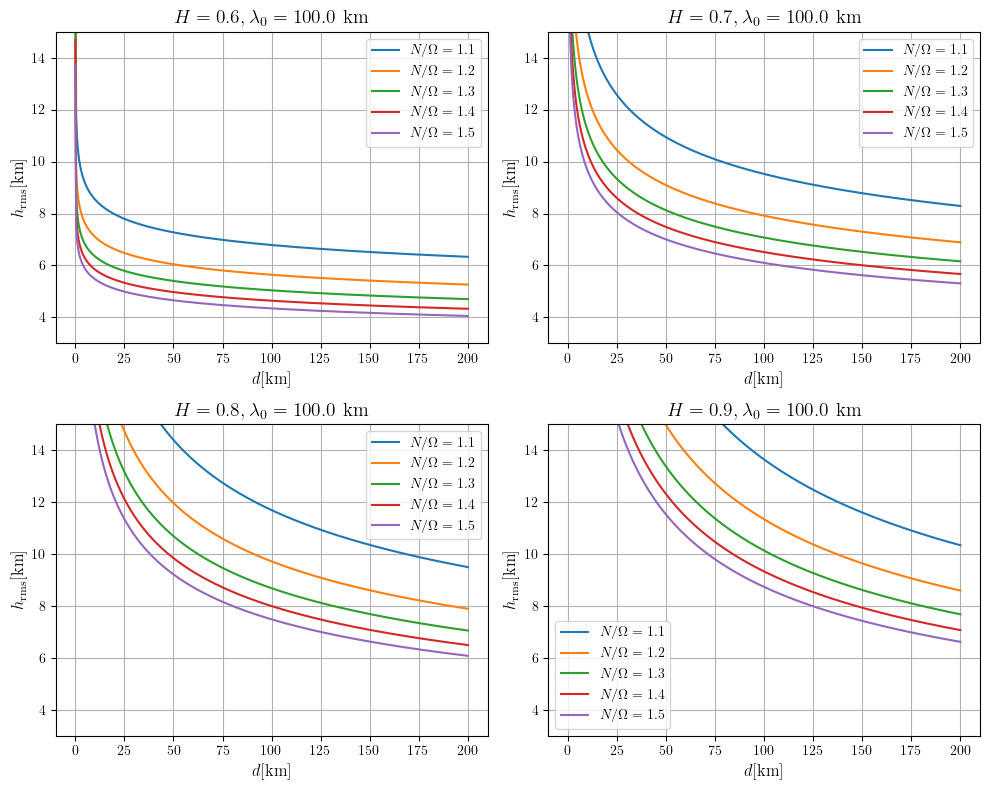

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

for j, H in enumerate(H_array):
    ax = axes[j]  # Select the current subplot
    for i in range(hrms.shape[0]):
        ax.plot(d/1e3, hrms[i,j]/1e3, label=fr'$N/\Omega = {N_array[i]}$')
        
    #ax.set_ylim(0, 2*hrms[0,j,-1]/1e3)
    ax.set_ylim(3, 15)
    ax.set_ylabel(r'$h_\mathrm{rms} [\mathrm{km}]$', fontsize=12)
    ax.set_xlabel(r'$d [\mathrm{km}]$', fontsize=12)
    ax.grid()
    ax.legend()
    
    # Add a title to each subplot
    ax.set_title(fr'$H = {H}, \lambda_0 = {lambda0/1e3}~\mathrm{{km}}$', fontsize=14)

# Adjust layout
plt.tight_layout()

#plt.savefig("Diss.pdf")
plt.show()